### The Data
**Read in the census_data.csv data with pandas**

In [1]:
import pandas as pd

In [4]:
great = pd.read_csv("data/great.csv")
bad = pd.read_csv("data/bad.csv")

In [6]:
great["target"] = 1
great.head()

,temp,bright,target
0,27.91,103,1
1,29.88,105,1
2,27.91,112,1
3,29.89,117,1
4,27.88,115,1


In [7]:
bad["target"] = 0
bad.head()

,temp,bright,target
0,23.77,1,0
1,27.80,1,0
2,27.80,1,0
3,27.84,1,0
4,25.82,3,0


In [11]:
total = pd.concat([great, bad])

### Perform a Train Test Split on the Data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_data = total.drop('target',axis=1)
y_labels = total['target']
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.3,random_state=101)

### Create the Feature Columns for tf.esitmator

In [14]:
import tensorflow as tf

**Create the continuous feature_columns for the continuous values using numeric_column**

In [15]:
temperature = tf.feature_column.numeric_column("temp")
brightness = tf.feature_column.numeric_column("bright")

**Put all these variables into a single list with the variable name feat_cols**

In [16]:
feat_cols = [temperature, brightness]

### Create Input Function
**Batch_size is up to you. But do make sure to shuffle!**

In [41]:
# tf.estimator.inputs.pandas_input_fn is depricated

input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,
                                               y=y_train,
                                               batch_size=100,
                                               num_epochs=None,
                                               shuffle=True)


'\ninput_func=tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,\n                                               y=y_train,\n                                               batch_size=100,\n                                               num_epochs=None,\n                                               shuffle=True)\n'

**Create your model with tf.estimator**

**Create a LinearClassifier.(If you want to use a DNNClassifier, keep in mind you'll need to create embedded columns out of the cateogrical feature that use strings, check out the previous lecture on this for more info.)**

In [19]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/vq/mcmhbqqs5m9425z6hwp9lkqh0000gq/T/tmp4dor1q3m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x141c86810>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [20]:
model.train(input_fn=input_func,steps=5000)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Ins

INFO:tensorflow:loss = 3.507445e-05, step = 3500 (0.099 sec)
INFO:tensorflow:global_step/sec: 759.094
INFO:tensorflow:loss = 3.4667304e-05, step = 3600 (0.132 sec)
INFO:tensorflow:global_step/sec: 793.967
INFO:tensorflow:loss = 2.5255076e-05, step = 3700 (0.124 sec)
INFO:tensorflow:global_step/sec: 955.647
INFO:tensorflow:loss = 2.8674816e-05, step = 3800 (0.107 sec)
INFO:tensorflow:global_step/sec: 782.492
INFO:tensorflow:loss = 1.5409905e-05, step = 3900 (0.128 sec)
INFO:tensorflow:global_step/sec: 609.54
INFO:tensorflow:loss = 1.4919339e-05, step = 4000 (0.161 sec)
INFO:tensorflow:global_step/sec: 759.828
INFO:tensorflow:loss = 2.6555606e-05, step = 4100 (0.133 sec)
INFO:tensorflow:global_step/sec: 890.97
INFO:tensorflow:loss = 2.0071197e-05, step = 4200 (0.112 sec)
INFO:tensorflow:global_step/sec: 756.739
INFO:tensorflow:loss = 1.5734491e-05, step = 4300 (0.133 sec)
INFO:tensorflow:global_step/sec: 786.077
INFO:tensorflow:loss = 2.468902e-05, step = 4400 (0.127 sec)
INFO:tensorflow

### Evaluation
**Create a prediction input function. Remember to only supprt X_test data and keep shuffle=False.**

In [22]:
pred_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

**Use model.predict() and pass in your input function. This will produce a generator of predictions, which you can then transform into a list, with list()**

In [23]:
predictions = list(model.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/vq/mcmhbqqs5m9425z6hwp9lkqh0000gq/T/tmp4dor1q3m/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [24]:
predictions[0]

{'logits': array([-9.974164], dtype=float32),
 'logistic': array([4.6551228e-05], dtype=float32),
 'probabilities': array([9.9995339e-01, 4.6585992e-05], dtype=float32),
 'class_ids': array([0]),
 'classes': array([b'0'], dtype=object),
 'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object)}

**Create a list of only the class_ids key values from the prediction list of dictionaries, these are the predictions you will use to compare against the real y_test values.**

In [25]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [26]:
final_preds[:10]

[0, 1, 0, 0, 0, 1, 1, 0, 0, 0]

**Import classification_report from sklearn.metrics and then see if you can figure out how to use it to easily get a full report of your model's performance on the test data.**

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        12

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [29]:
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=len(X_test),shuffle=False)

In [30]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        12

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [31]:
results = model.evaluate(eval_input_func)
results

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-20T09:03:09Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/vq/mcmhbqqs5m9425z6hwp9lkqh0000gq/T/tmp4dor1q3m/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-20-09:03:10
INFO:tensorflow:Saving dict for global step 5000: accuracy = 1.0, accuracy_ba

{'accuracy': 1.0,
 'accuracy_baseline': 0.5862069,
 'auc': 1.0,
 'auc_precision_recall': 1.0,
 'average_loss': 1.6949267e-05,
 'label/mean': 0.41379312,
 'loss': 1.6949267e-05,
 'precision': 1.0,
 'prediction/mean': 0.41380918,
 'recall': 1.0,
 'global_step': 5000}

In [42]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(X_train.values, y_train.values, epochs=400, batch_size=1)

Train on 65 samples
Epoch 1/400
65/65 [==============================] - 1s 8ms/sample - loss: 0.3012 - mae: 0.5000
Epoch 2/400
65/65 [==============================] - 0s 1ms/sample - loss: 0.2716 - mae: 0.5000
Epoch 3/400
65/65 [==============================] - 0s 1ms/sample - loss: 0.2668 - mae: 0.5000
Epoch 4/400
65/65 [==============================] - 0s 1ms/sample - loss: 0.2665 - mae: 0.5000
Epoch 5/400
65/65 [==============================] - 0s 1ms/sample - loss: 0.2651 - mae: 0.5000
Epoch 6/400
65/65 [==============================] - 0s 1ms/sample - loss: 0.2650 - mae: 0.5000
Epoch 7/400
65/65 [==============================] - 0s 1ms/sample - loss: 0.2636 - mae: 0.5000
Epoch 8/400
65/65 [==============================] - 0s 1ms/sample - loss: 0.2638 - mae: 0.5000
Epoch 9/400
65/65 [==============================] - 0s 1ms/sample - loss: 0.2655 - mae: 0.5000
Epoch 10/400
65/65 [==============================] - 0s 1ms/sample - loss: 0.2628 - mae: 0.5000
Epoch 11/400
65/65 

65/65 [==============================] - 0s 1ms/sample - loss: 0.2500 - mae: 0.5000
Epoch 78/400
65/65 [==============================] - 0s 928us/sample - loss: 0.2500 - mae: 0.5000
Epoch 79/400
65/65 [==============================] - 0s 994us/sample - loss: 0.2500 - mae: 0.5000
Epoch 80/400
65/65 [==============================] - 0s 1ms/sample - loss: 0.2500 - mae: 0.5000
Epoch 81/400
65/65 [==============================] - 0s 977us/sample - loss: 0.2500 - mae: 0.5000
Epoch 82/400
65/65 [==============================] - 0s 924us/sample - loss: 0.2500 - mae: 0.5000
Epoch 83/400
65/65 [==============================] - 0s 919us/sample - loss: 0.2500 - mae: 0.5000
Epoch 84/400
65/65 [==============================] - 0s 936us/sample - loss: 0.2500 - mae: 0.5000
Epoch 85/400
65/65 [==============================] - 0s 945us/sample - loss: 0.2500 - mae: 0.5000
Epoch 86/400
65/65 [==============================] - 0s 938us/sample - loss: 0.2500 - mae: 0.5000
Epoch 87/400
65/65 [=======

Epoch 160/400
65/65 [==============================] - 0s 950us/sample - loss: 0.2500 - mae: 0.5000
Epoch 161/400
65/65 [==============================] - 0s 994us/sample - loss: 0.2500 - mae: 0.5000
Epoch 162/400
65/65 [==============================] - 0s 977us/sample - loss: 0.2500 - mae: 0.5000
Epoch 163/400
65/65 [==============================] - 0s 1ms/sample - loss: 0.2500 - mae: 0.5000
Epoch 164/400
65/65 [==============================] - 0s 978us/sample - loss: 0.2500 - mae: 0.5000
Epoch 165/400
65/65 [==============================] - 0s 923us/sample - loss: 0.2500 - mae: 0.5000
Epoch 166/400
65/65 [==============================] - 0s 927us/sample - loss: 0.2500 - mae: 0.5000
Epoch 167/400
65/65 [==============================] - 0s 935us/sample - loss: 0.2500 - mae: 0.5000
Epoch 168/400
65/65 [==============================] - 0s 1ms/sample - loss: 0.2500 - mae: 0.5000
Epoch 169/400
65/65 [==============================] - 0s 1ms/sample - loss: 0.2500 - mae: 0.5000
Epoch 

65/65 [==============================] - 0s 994us/sample - loss: 0.2500 - mae: 0.5000
Epoch 243/400
65/65 [==============================] - 0s 970us/sample - loss: 0.2500 - mae: 0.5000
Epoch 244/400
65/65 [==============================] - 0s 991us/sample - loss: 0.2500 - mae: 0.5000
Epoch 245/400
65/65 [==============================] - 0s 994us/sample - loss: 0.2500 - mae: 0.5000
Epoch 246/400
65/65 [==============================] - 0s 1ms/sample - loss: 0.2500 - mae: 0.5000
Epoch 247/400
65/65 [==============================] - 0s 961us/sample - loss: 0.2500 - mae: 0.5000
Epoch 248/400
65/65 [==============================] - 0s 979us/sample - loss: 0.2500 - mae: 0.5000
Epoch 249/400
65/65 [==============================] - 0s 986us/sample - loss: 0.2500 - mae: 0.5000
Epoch 250/400
65/65 [==============================] - 0s 987us/sample - loss: 0.2500 - mae: 0.5000
Epoch 251/400
65/65 [==============================] - 0s 1ms/sample - loss: 0.2500 - mae: 0.5000
Epoch 252/400
65/6

65/65 [==============================] - 0s 973us/sample - loss: 0.2500 - mae: 0.5000
Epoch 325/400
65/65 [==============================] - 0s 1ms/sample - loss: 0.2500 - mae: 0.5000
Epoch 326/400
65/65 [==============================] - 0s 980us/sample - loss: 0.2500 - mae: 0.5000
Epoch 327/400
65/65 [==============================] - 0s 953us/sample - loss: 0.2500 - mae: 0.5000
Epoch 328/400
65/65 [==============================] - 0s 945us/sample - loss: 0.2500 - mae: 0.5000
Epoch 329/400
65/65 [==============================] - 0s 947us/sample - loss: 0.2500 - mae: 0.5000
Epoch 330/400
65/65 [==============================] - 0s 973us/sample - loss: 0.2500 - mae: 0.5000
Epoch 331/400
65/65 [==============================] - 0s 1ms/sample - loss: 0.2500 - mae: 0.5000
Epoch 332/400
65/65 [==============================] - 0s 978us/sample - loss: 0.2500 - mae: 0.5000
Epoch 333/400
65/65 [==============================] - 0s 985us/sample - loss: 0.2500 - mae: 0.5000
Epoch 334/400
65/6

predictions =
 [[0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.517 0.483]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]
 [0.5   0.5  ]]
actual =
 20    0
6     1
46    0
7     0
14    0
32    1
21    1
38    0
13    0
50    0
11    0
39    0
3     1
1     1
3     0
16    1
42    0
25    1
19    0
2     1
13    1
21    0
52    0
45    0
31    1
9     0
14    1
23    1
23    0
Name: target, dtype: int64


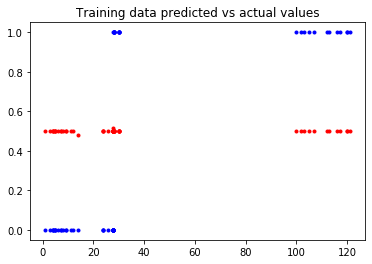

In [46]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# use the model to predict the test inputs
predictions = model.predict(X_test.values)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", y_test)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(X_test.values, y_test.values, 'b.', label='Actual')
plt.plot(X_test.values, predictions, 'r.', label='Predicted')
plt.show()

### Convert the Trained Model to Tensor Flow Lite
**The next cell converts the model to TFlite format. The size in bytes of the model is also printed out.**

In [47]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 5400 bytes


### Encode the Model in an Arduino Header File
**The next cell creates a constant byte array that contains the TFlite model. Import it as a tab with the sketch below.**

In [50]:
!echo "const unsigned char model[] = {" > data/model.h
!cat gesture_model.tflite | xxd -i      >> data/model.h
!echo "};"                              >> data/model.h

import os
model_h_size = os.path.getsize("data/model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 33,334 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
